# Clustering and Dimensionality Reduction Exam
Welcome to the weekly project on clustering and dimensionality reduction. You will be working with a dataset of traffic accidents.

## Dataset
The dataset that will be used in this task is `Traffic_Accidents.csv`

## Instructions
- Follow the steps outlined below.
- Write your code in the empty code cells.
- Comment on your code to explain your reasoning.

## Dataset Overview
The dataset contains information about traffic accidents, including location, weather conditions, road conditions, and more. Below are sample of these columns:

* `Location_Easting_OSGR`: Easting coordinate of the accident location.
* `Location_Northing_OSGR`: Northing coordinate of the accident location.
* `Longitude`: Longitude of the accident site.
* `Latitude`: Latitude of the accident site.
* `Police_Force`: Identifier for the police force involved.
* `Accident_Severity`: Severity of the accident.
* `Number_of_Vehicles`: Number of vehicles involved in the accident.
* `Number_of_Casualties`: Number of casualties in the accident.
* `Date`: Date of the accident.
* `Day_of_Week`: Day of the week when the accident occurred.
* `Speed_limit`: Speed limit in the area where the accident occurred.
* `Weather_Conditions`: Weather conditions at the time of the accident.
* `Road_Surface_Conditions`: Condition of the road surface during the accident.
* `Urban_or_Rural_Area`: Whether the accident occurred in an urban or rural area.
* `Year`: Year when the accident was recorded.
* Additional attributes related to road type, pedestrian crossing, light conditions, etc.

## Goal
The primary goal is to analyze the accidents based on their geographical location.


## Import Libraries

In [85]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.impute import KNNImputer
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier ,BaggingClassifier ,GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.ensemble import StackingClassifier
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

## Load the Data

In [2]:
df = pd.read_csv("/content/Traffic_Accidents.csv")
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Raining with high winds,Flood (Over 3cm of water),2.0,Yes,2009.0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Fine without high winds,Dry,1.0,Yes,2010.0
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,3,4055,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2005.0
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2007.0
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2013.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21588,313960.0,181630.0,-3.241694,51.526956,62,3.0,3,1.0,17/02/2006,6,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,2.0,Yes,2006.0
21589,228766.0,642993.0,-4.722931,55.650250,97,3.0,2,1.0,27/12/2013,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,Yes,2013.0
21590,519170.0,142740.0,-0.296757,51.171433,45,3.0,1,1.0,10/07/2010,7,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Dry,2.0,Yes,2010.0
21591,324680.0,501640.0,-3.161858,54.404635,3,2.0,1,1.0,07/10/2012,1,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,2.0,Yes,2012.0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21593 entries, 0 to 21592
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        21593 non-null  float64
 1   Location_Northing_OSGR                       21593 non-null  float64
 2   Longitude                                    21593 non-null  float64
 3   Latitude                                     21593 non-null  float64
 4   Police_Force                                 21593 non-null  int64  
 5   Accident_Severity                            21435 non-null  float64
 6   Number_of_Vehicles                           21593 non-null  int64  
 7   Number_of_Casualties                         21122 non-null  float64
 8   Date                                         21593 non-null  object 
 9   Day_of_Week                                  21593 non-null  int64  
 10

In [6]:
# df['Local_Authority_(District)']
df['Local_Authority_(Highway)']

,Local_Authority_(Highway)
0,E10000011
1,E09000017
2,W06000014
3,E10000017
4,E06000021
...,...
21588,W06000015
21589,S12000021
21590,E10000030
21591,E10000006


## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [7]:
df.describe()

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Day_of_Week,Local_Authority_(District),1st_Road_Class,1st_Road_Number,Speed_limit,2nd_Road_Class,2nd_Road_Number,Urban_or_Rural_Area,Year
count,21593.000000,2.159300e+04,21593.000000,21593.000000,21593.000000,21435.000000,21593.000000,21122.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21593.000000,21555.000000,21592.000000
mean,440391.590840,3.003516e+05,-1.425774,52.591024,30.489696,2.837089,1.832029,1.356027,4.135599,350.022924,4.080489,1006.661464,39.203909,2.660862,379.268235,1.362097,2009.390237
std,95436.883894,1.616927e+05,1.402957,1.456083,25.632289,0.404043,0.714851,0.835073,1.929339,259.950567,1.431790,1822.631642,14.238116,3.206964,1297.308692,0.480714,2.994784
min,118690.000000,1.903000e+04,-6.763727,50.026153,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,20.000000,-1.000000,-1.000000,1.000000,2005.000000
25%,375269.000000,1.782300e+05,-2.370203,51.489568,7.000000,3.000000,1.000000,1.000000,2.000000,114.000000,3.000000,0.000000,30.000000,-1.000000,0.000000,1.000000,2006.000000
50%,441880.000000,2.683100e+05,-1.380119,52.305678,30.000000,3.000000,2.000000,1.000000,4.000000,324.000000,4.000000,130.000000,30.000000,3.000000,0.000000,1.000000,2010.000000
75%,523610.000000,3.986700e+05,-0.211435,53.482622,46.000000,3.000000,2.000000,1.000000,6.000000,530.000000,6.000000,721.000000,50.000000,6.000000,0.000000,2.000000,2012.000000
max,654960.000000,1.183525e+06,1.753632,60.532880,98.000000,3.000000,11.000000,42.000000,7.000000,941.000000,6.000000,9999.000000,70.000000,6.000000,9999.000000,3.000000,2014.000000


In [9]:
df.shape

(21593, 26)

In [10]:
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
2877,429620.0,434630.0,-1.551692,53.807122,13,3.0,1,1.0,12/12/2011,2,...,-1,0,None within 50 metres,non-junction pedestrian crossing,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2011.0
4340,515000.0,183910.0,-0.343079,51.542328,1,3.0,2,1.0,22/05/2007,3,...,5,0,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,No,2007.0
10655,443430.0,168800.0,-1.376872,51.416507,43,3.0,1,2.0,10/04/2006,2,...,-1,0,None within 50 metres,No physical crossing within 50 meters,Darkeness: No street lighting,Fine without high winds,Wet/Damp,2.0,Yes,2006.0
7071,405670.0,286070.0,-1.917966,52.472505,20,3.0,2,1.0,27/02/2010,7,...,3,456,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,No,2010.0
11891,436530.0,281640.0,-1.464144,52.431493,20,3.0,2,1.0,04/03/2006,7,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Other,Frost/Ice,1.0,No,2006.0


In [11]:
df.duplicated().sum()

4

In [13]:
df = df.drop_duplicates()

In [14]:
df.duplicated().sum()

0

In [16]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,158
Number_of_Vehicles,0
Number_of_Casualties,471
Date,0
Day_of_Week,0


## Data Preprocessing
Do what you think you need such as:
* Remove the outliers
* Impute missing data
* Scale the data
* Reduce dimentions using PCA
* Implement One-Hot Encoding for nominal categorical variables.

In [20]:
df.columns

Index(['Location_Easting_OSGR', 'Location_Northing_OSGR', 'Longitude',
       'Latitude', 'Police_Force', 'Accident_Severity', 'Number_of_Vehicles',
       'Number_of_Casualties', 'Date', 'Day_of_Week',
       'Local_Authority_(District)', 'Local_Authority_(Highway)',
       '1st_Road_Class', '1st_Road_Number', 'Road_Type', 'Speed_limit',
       '2nd_Road_Class', '2nd_Road_Number',
       'Pedestrian_Crossing-Human_Control',
       'Pedestrian_Crossing-Physical_Facilities', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Did_Police_Officer_Attend_Scene_of_Accident', 'Year'],
      dtype='object')

In [27]:
df['Accident_Severity']

,Accident_Severity
0,3.0
1,3.0
2,3.0
3,3.0
4,3.0
...,...
21588,3.0
21589,3.0
21590,3.0
21591,2.0


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17]),
 [Text(1, 0, 'Location_Easting_OSGR'),
  Text(2, 0, 'Location_Northing_OSGR'),
  Text(3, 0, 'Longitude'),
  Text(4, 0, 'Latitude'),
  Text(5, 0, 'Police_Force'),
  Text(6, 0, 'Accident_Severity'),
  Text(7, 0, 'Number_of_Vehicles'),
  Text(8, 0, 'Number_of_Casualties'),
  Text(9, 0, 'Day_of_Week'),
  Text(10, 0, 'Local_Authority_(District)'),
  Text(11, 0, '1st_Road_Class'),
  Text(12, 0, '1st_Road_Number'),
  Text(13, 0, 'Speed_limit'),
  Text(14, 0, '2nd_Road_Class'),
  Text(15, 0, '2nd_Road_Number'),
  Text(16, 0, 'Urban_or_Rural_Area'),
  Text(17, 0, 'Year')])

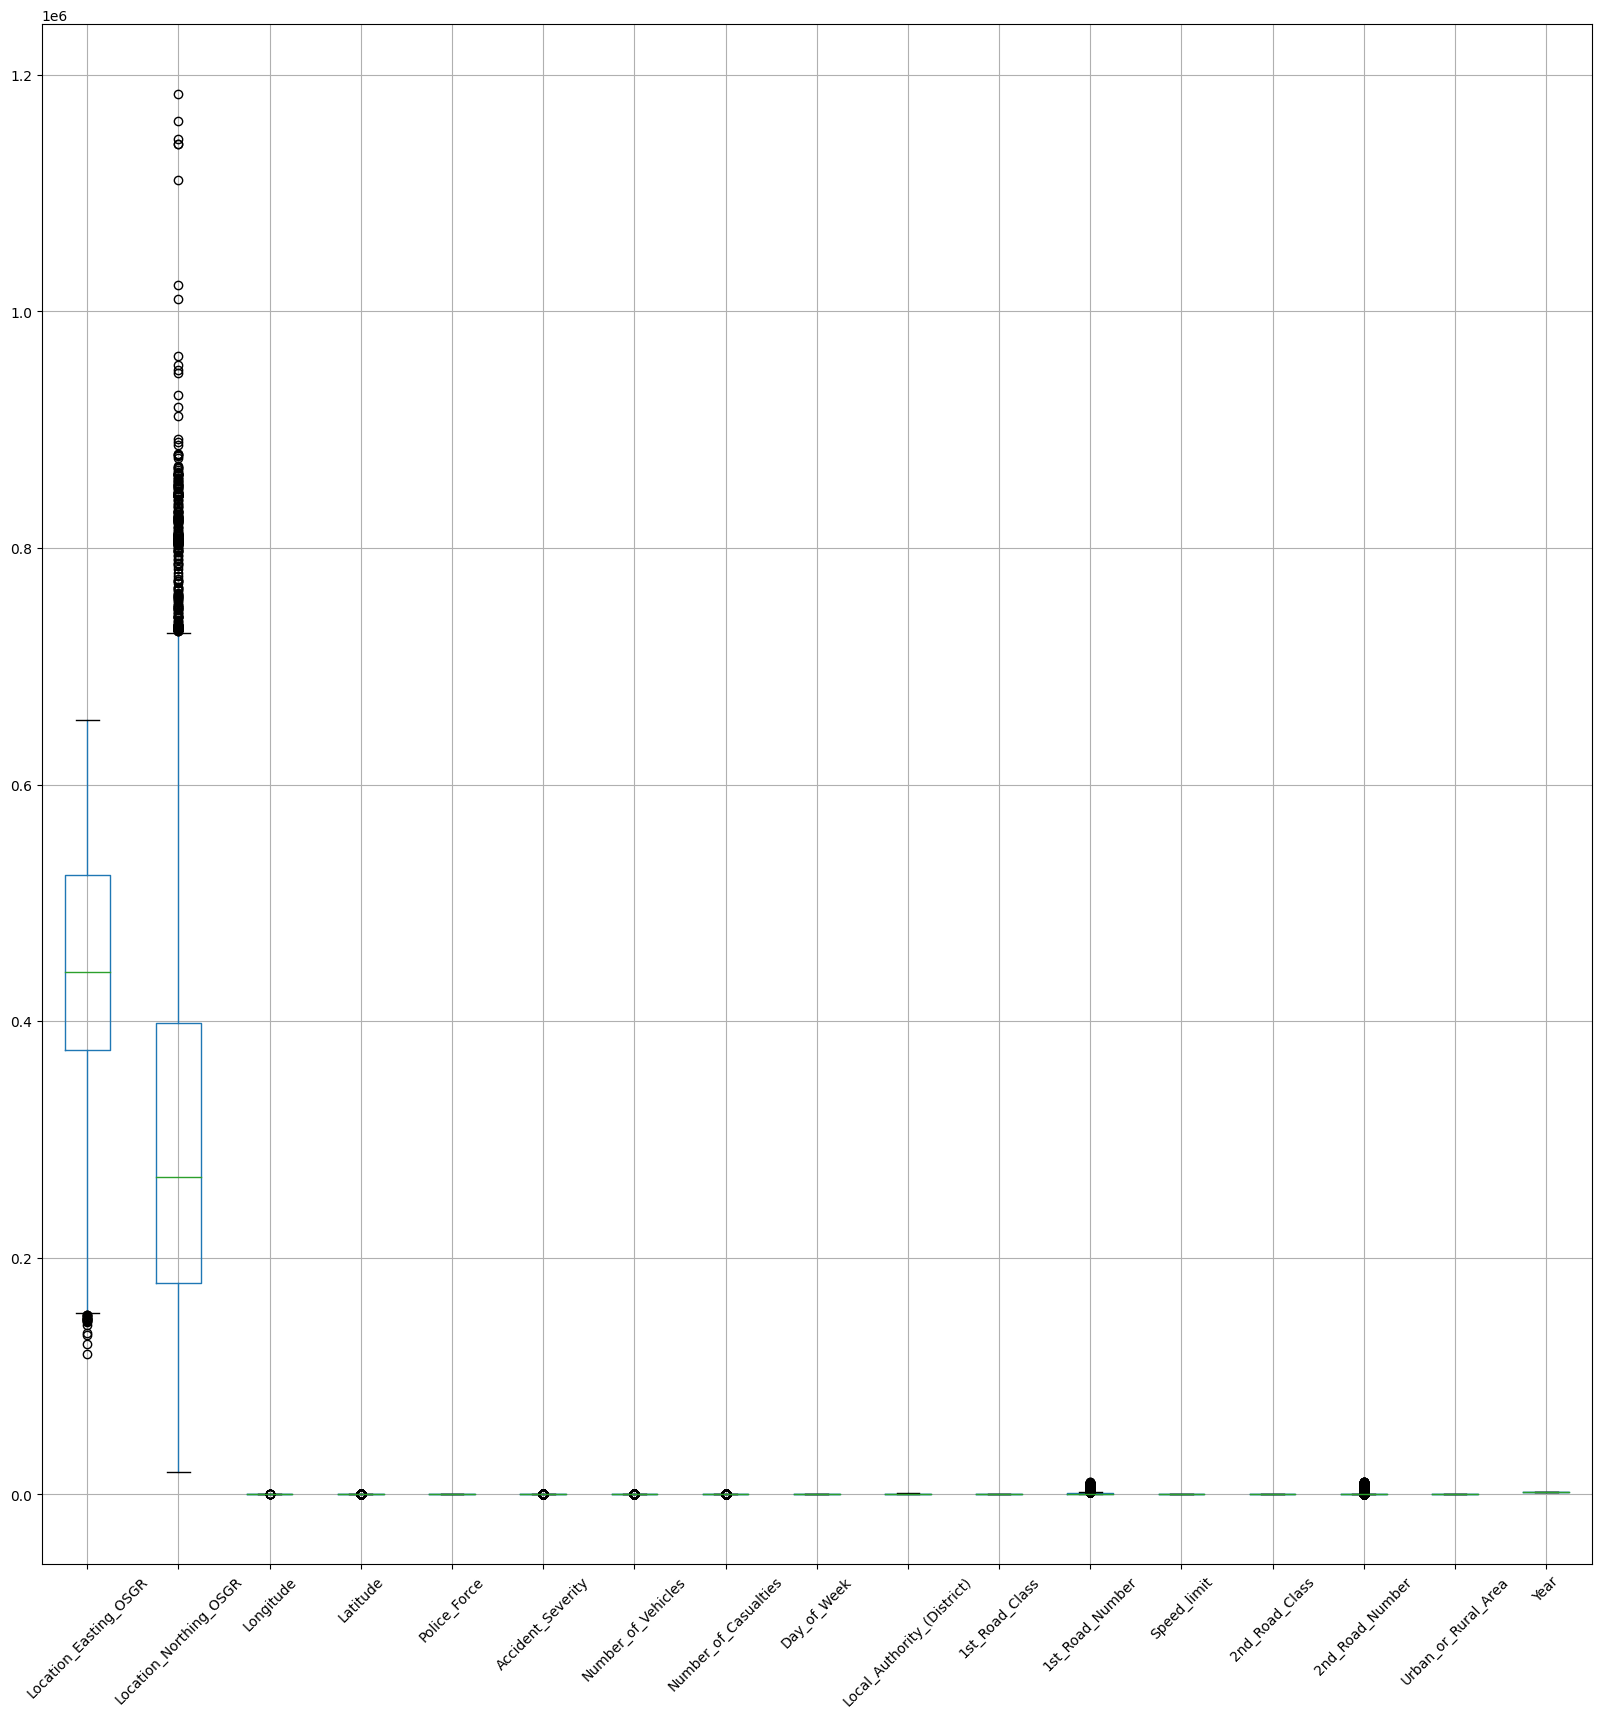

In [19]:

plt.figure(figsize=(20, 20))
df.boxplot()
plt.xticks(rotation=45)

(array([1]), [Text(1, 0, 'Year')])

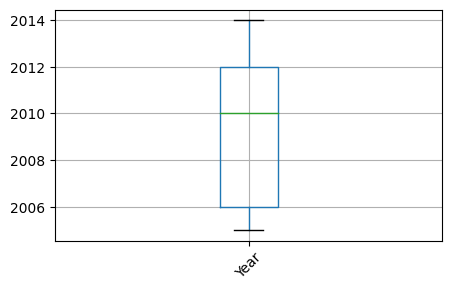

In [33]:
# col = ['Accident_Severity' , 'Number_of_Vehicles','Number_of_Casualties','Year']
# col = ['Accident_Severity']
# col = ['Number_of_Vehicles']
# col=['Number_of_Casualties']
col = ['Year']
plt.figure(figsize=(5, 3))
df[col].boxplot()
plt.xticks(rotation=45)

In [ ]:
# there is no outlier Unexpected

In [34]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,158
Number_of_Vehicles,0
Number_of_Casualties,471
Date,0
Day_of_Week,0


In [ ]:
#  i will use KNNImputer

In [35]:
knn = KNNImputer(n_neighbors=5)
df[['Number_of_Casualties']] = knn.fit_transform(df[['Number_of_Casualties']])

<ipython-input-35-66191ccfc7d9>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Number_of_Casualties']] = knn.fit_transform(df[['Number_of_Casualties']])


In [41]:
df['Light_Conditions'].info()

<class 'pandas.core.series.Series'>
Index: 21589 entries, 0 to 21592
Series name: Light_Conditions
Non-Null Count  Dtype 
--------------  ----- 
21367 non-null  object
dtypes: object(1)
memory usage: 337.3+ KB


In [42]:
df[['Accident_Severity']] = knn.fit_transform(df[['Accident_Severity']])

<ipython-input-42-5fa020de3b73>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Accident_Severity']] = knn.fit_transform(df[['Accident_Severity']])


In [43]:
df[['Urban_or_Rural_Area']] = knn.fit_transform(df[['Urban_or_Rural_Area']])

<ipython-input-43-65ae03740469>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[['Urban_or_Rural_Area']] = knn.fit_transform(df[['Urban_or_Rural_Area']])


In [44]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [ ]:
#  i will use mode to fill the Light_Conditions null

In [45]:
df['Light_Conditions'] = df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0])

<ipython-input-45-b3628818cdce>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Light_Conditions'] = df['Light_Conditions'].fillna(df['Light_Conditions'].mode()[0])


In [46]:
df.isnull().sum()

,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [47]:
df = df.dropna()

In [48]:
df.isnull().sum()


,0
Location_Easting_OSGR,0
Location_Northing_OSGR,0
Longitude,0
Latitude,0
Police_Force,0
Accident_Severity,0
Number_of_Vehicles,0
Number_of_Casualties,0
Date,0
Day_of_Week,0


In [49]:
df.sample(5)

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,2nd_Road_Class,2nd_Road_Number,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,Year
8185,336390.0,390460.0,-2.958341,53.407096,5,3.0,1,1.000000,29/09/2006,6,...,3,5047,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2006.0
14089,455539.0,339619.0,-1.174813,52.951064,31,3.0,2,1.356094,18/07/2014,6,...,3,6130,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Dry,1.0,Yes,2014.0
3931,406680.0,266870.0,-1.903474,52.299881,22,3.0,2,2.000000,26/10/2012,6,...,3,4189,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Fine without high winds,Wet/Damp,1.0,Yes,2012.0
3989,435460.0,387640.0,-1.468342,53.384409,14,3.0,2,1.000000,12/01/2007,6,...,6,0,None within 50 metres,No physical crossing within 50 meters,Darkness: Street lights present and lit,Raining without high winds,Wet/Damp,1.0,No,2007.0
19917,442690.0,292730.0,-1.372129,52.530743,33,2.0,1,1.000000,30/04/2009,5,...,6,7510,None within 50 metres,No physical crossing within 50 meters,Daylight: Street light present,Raining without high winds,Wet/Damp,1.0,Yes,2009.0


In [57]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21588 entries, 0 to 21591
Data columns (total 26 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   Location_Easting_OSGR                        21588 non-null  float64
 1   Location_Northing_OSGR                       21588 non-null  float64
 2   Longitude                                    21588 non-null  float64
 3   Latitude                                     21588 non-null  float64
 4   Police_Force                                 21588 non-null  int64  
 5   Accident_Severity                            21588 non-null  float64
 6   Number_of_Vehicles                           21588 non-null  int64  
 7   Number_of_Casualties                         21588 non-null  float64
 8   Date                                         21588 non-null  object 
 9   Day_of_Week                                  21588 non-null  int64  
 10  Loc

In [64]:
col_to_onehot =['Pedestrian_Crossing-Human_Control'	 , 'Pedestrian_Crossing-Physical_Facilities'	, 'Light_Conditions' , 'Weather_Conditions'	 ,'Road_Surface_Conditions' ,  'Did_Police_Officer_Attend_Scene_of_Accident'	,'Local_Authority_(Highway)' , 'Road_Type']

ohe  = OneHotEncoder(sparse_output= False).set_output(transform = 'pandas')
colOHE = ohe.fit_transform(df[col_to_onehot])

In [65]:
colOHE

,Pedestrian_Crossing-Human_Control_Control by other authorised person,Pedestrian_Crossing-Human_Control_Control by school crossing patrol,Pedestrian_Crossing-Human_Control_None within 50 metres,Pedestrian_Crossing-Physical_Facilities_Central refuge,Pedestrian_Crossing-Physical_Facilities_Footbridge or subway,Pedestrian_Crossing-Physical_Facilities_No physical crossing within 50 meters,Pedestrian_Crossing-Physical_Facilities_Pedestrian phase at traffic signal junction,Pedestrian_Crossing-Physical_Facilities_Zebra crossing,Pedestrian_Crossing-Physical_Facilities_non-junction pedestrian crossing,Light_Conditions_Darkeness: No street lighting,...,Local_Authority_(Highway)_W06000021,Local_Authority_(Highway)_W06000022,Local_Authority_(Highway)_W06000023,Local_Authority_(Highway)_W06000024,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21588,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21589,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21590,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [68]:
df = pd.concat([df,colOHE] , axis=1)
df

,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,...,Local_Authority_(Highway)_W06000021,Local_Authority_(Highway)_W06000022,Local_Authority_(Highway)_W06000023,Local_Authority_(Highway)_W06000024,Road_Type_Dual carriageway,Road_Type_One way street,Road_Type_Roundabout,Road_Type_Single carriageway,Road_Type_Slip road,Road_Type_Unknown
0,560530.0,103950.0,0.277298,50.812789,47,3.0,1,1.0,27/11/2009,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,508860.0,187170.0,-0.430574,51.572846,1,3.0,2,1.0,10/10/2010,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,314460.0,169130.0,-3.231459,51.414661,62,3.0,2,1.0,14/09/2005,4,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,341700.0,408330.0,-2.881800,53.568318,4,3.0,1,2.0,18/08/2007,7,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,386488.0,350090.0,-2.203020,53.047882,21,3.0,2,2.0,06/08/2013,3,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21587,185790.0,730410.0,-5.474503,56.417222,97,3.0,1,1.0,12/08/2010,5,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
21588,313960.0,181630.0,-3.241694,51.526956,62,3.0,3,1.0,17/02/2006,6,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
21589,228766.0,642993.0,-4.722931,55.650250,97,3.0,2,1.0,27/12/2013,6,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
21590,519170.0,142740.0,-0.296757,51.171433,45,3.0,1,1.0,10/07/2010,7,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [69]:
df = df.drop(columns = df[col_to_onehot])

In [75]:
df =  df.drop(columns= df[['Date']])

In [76]:
scl = StandardScaler()
dfscl = scl.fit_transform(df)
dfscl

array([[ 1.25876599, -1.21452576,  1.21385887, ..., -1.73012737,
        -0.1000608 , -0.07538837],
       [ 0.71736313, -0.6998596 ,  0.70930322, ...,  0.57799213,
        -0.1000608 , -0.07538837],
       [-1.3195774 , -0.81142626, -1.28710624, ...,  0.57799213,
        -0.1000608 , -0.07538837],
       ...,
       [-2.21748676,  2.11913432, -2.3501948 , ...,  0.57799213,
        -0.1000608 , -0.07538837],
       [ 0.82539222, -0.9746327 ,  0.80468505, ...,  0.57799213,
        -0.1000608 , -0.07538837],
       [-1.21249132,  1.24495016, -1.23749617, ...,  0.57799213,
        -0.1000608 , -0.07538837]])

In [78]:
pca =PCA(n_components=0.7)
dfpca = pca.fit_transform(dfscl)

## Feature Selection
Select relevant features for clustering. Explain your choice of features.


In [ ]:
#  in previos cell i am using pca

## Data Visualization
Visualize the data using appropriate plots to gain insights into the dataset. Using the following:
- Scatter plot of accidents based on Longitude and Latitude.

<Axes: >

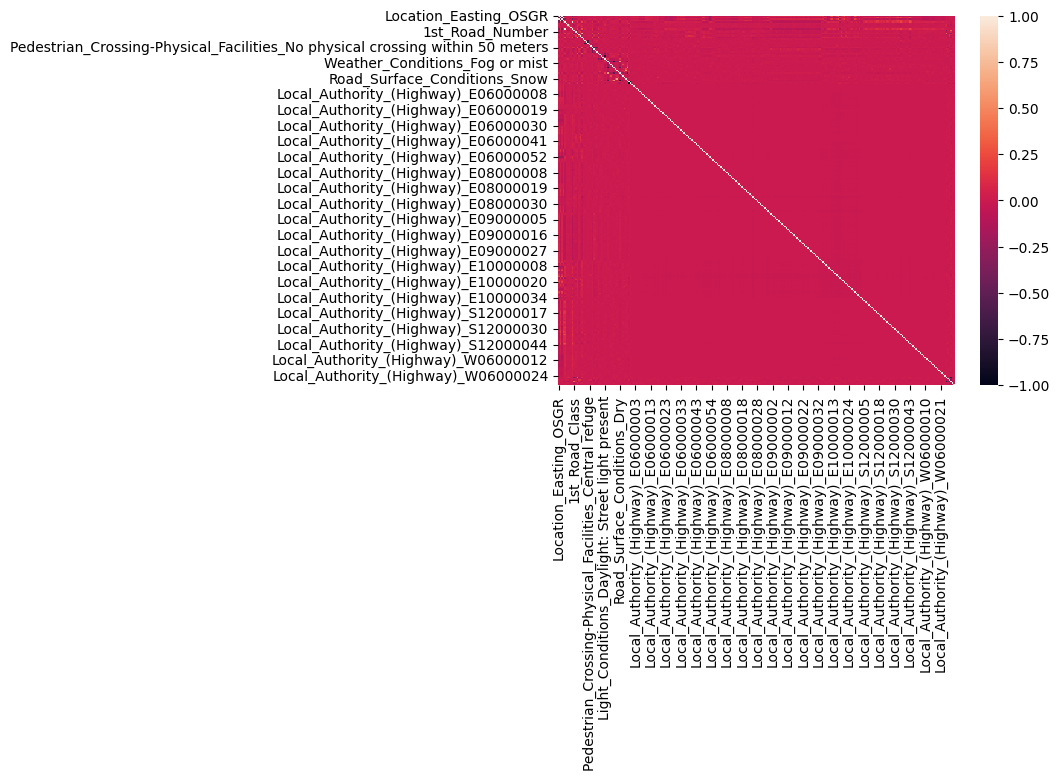

In [95]:
sns.heatmap(df.corr())

## Clustering
Apply K-Means clustering. Determine the optimal number of clusters and justify your choice.
* Find the `n_clusters` parameter using the elbow method.
* Train the model.

In [81]:
wcss =[]

for i in range(1,8):
  kmeans = KMeans(n_clusters=i,random_state=42)
  kmeans.fit(dfpca)
  wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` ex

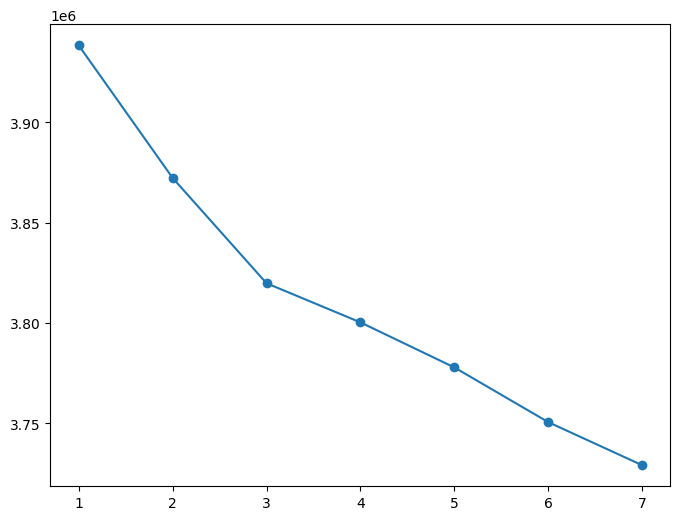

In [82]:
plt.figure(figsize=(8,6))
plt.plot(range(1,8),wcss,marker='o')

In [ ]:
#  i think the n_clusters = 4 or 3 i will chose 3

In [83]:
knn = KMeans(n_clusters=3,random_state=42).fit(dfpca)


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [84]:
labels = knn.labels_
labels

array([1, 0, 1, ..., 2, 1, 1], dtype=int32)

## Evaluation
Evaluate the clustering result using appropriate metrics.


In [86]:
sil = silhouette_score(dfpca,labels)
print(f'Silhouette Score: {sil}')

Silhouette Score: 0.008344241676371099


In [ ]:
#  the result its good because when the sli closer to zero be better.

## Plot the data points with their predicted cluster center

Text(0.5, 1.0, 'K-Means Clustering')

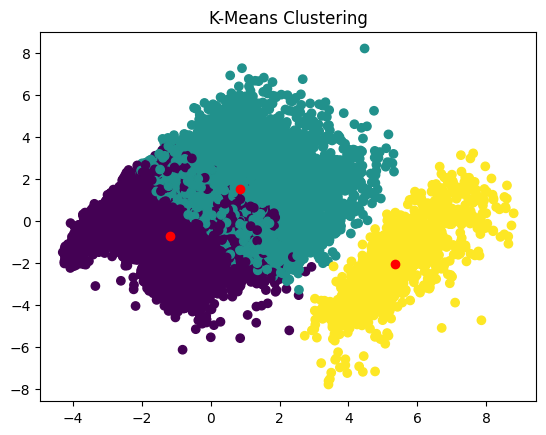

In [90]:
plt.scatter(dfpca[:, 0], dfpca[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(knn.cluster_centers_[:, 0], knn.cluster_centers_[:, 1], c='red')
plt.title('K-Means Clustering')

In [91]:
#  now i will assum the n_clusters = 4 and i will see

In [92]:
knn = KMeans(n_clusters=4,random_state=42).fit(dfpca)
labels = knn.labels_
sil = silhouette_score(dfpca,labels)
print(f'Silhouette Score: {sil}')

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


Silhouette Score: 0.007435502231217657


In [93]:
#  3 its better until now  because its mutch closer to 0

Text(0.5, 1.0, 'K-Means Clustering')

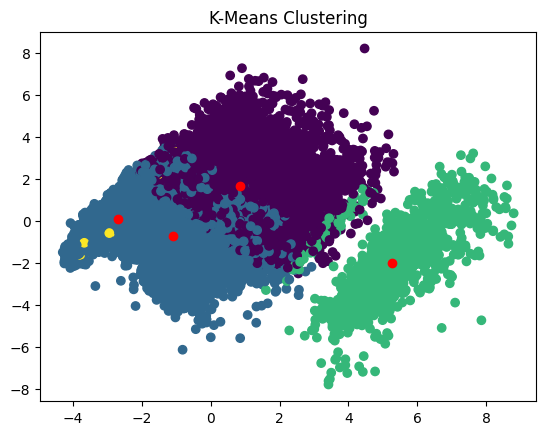

In [94]:
plt.scatter(dfpca[:, 0], dfpca[:, 1], c=labels, cmap='viridis', marker='o')
plt.scatter(knn.cluster_centers_[:, 0], knn.cluster_centers_[:, 1], c='red')
plt.title('K-Means Clustering')

In [ ]:
#  the n_clusters = 3 its better

## Exam Questions
* **Justify Your Feature Selection:**
   - Which features did you choose for clustering and why?
* **Number of Clusters Choices:**
   - How did you determine the optimal number?
* **Evaluation:**
   - Which metrics did you use to evaluate the clustering results, and why?
   - How do these metrics help in understanding the effectiveness of your clustering approach?
* **Improvements and Recommendations:**
   - Suggest any improvements or future work that could be done with this dataset. What other methods or algorithms would you consider applying?

Number of Clusters Choices:     
using elbow method           
                     

               
Evaluation
* i am using silhouette_score because its one of the metrics in unsupervised learning and its good chouse for kmean



the n_clusters = 3 its better  
